Методы поиска контуров в библиотеке OpenCV (cv2) довольно обширны,
что открывает большой простор для творчества и экспериментов с
точностью и скоростью определения нужных объектов на изображении.

```cv.findContours(	image, mode, method[, contours[, hierarchy[, offset]]]	)
-> contours, hierarchy```

<b>mode</b>

[RetrievalModes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)


RETR_EXTERNAL<br>
<i>retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.
</i>

RETR_LIST<br>
<i>retrieves all of the contours without establishing any hierarchical relationships.
</i>

RETR_CCOMP <br>
<i>retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.
</i>

RETR_TREE <br>
<i>retrieves all of the contours and reconstructs a full hierarchy of nested contours.
</i>

RETR_FLOODFILL <br>
<i>Finds all the pixels that are:<br>
1-connected to each other<br>
2-have intensity values close to each other</i>


<b>method</b>

[ContourApproximationModes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)

CHAIN_APPROX_NONE <br>
<i>
stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.
</i>

CHAIN_APPROX_SIMPLE <br>
<i>
compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.
</i>

CHAIN_APPROX_TC89_L1  <br>
<i>
applies one of the flavors of [the Teh-Chin chain approximation algorithm](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=31447)
</i>

CHAIN_APPROX_TC89_KCOS  <br>
<i>
applies one of the flavors of [the Teh-Chin chain approximation algorithm](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=31447)</i>

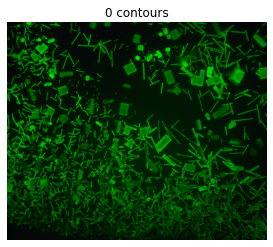

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# color filter params
hsv_min = np.array((2, 28, 65), np.uint8)
hsv_max = np.array((26, 238, 255), np.uint8)

def algorithm_1(img):
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    filter_img = cv.inRange(hsv_img, hsv_min, hsv_max)
    contours, hierarchy = cv.findContours(filter_img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # params: img, RetrievalMode, ContourApproximationMode
    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_1(img)

cv.drawContours(img, contours, -1, (50, 50, 255), 2, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()

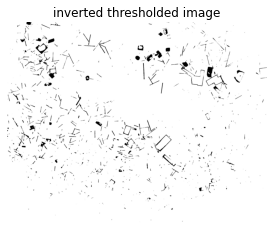

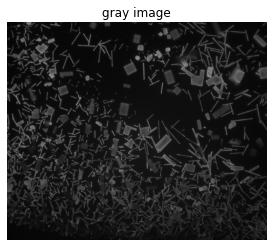

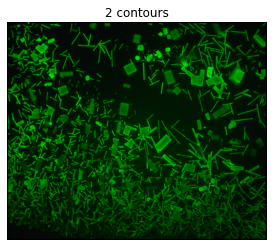

In [8]:
import cv2 as cv
from matplotlib import pyplot as plt

def algorithm_2(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, inv_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY_INV)
    contours, hierarchy = cv.findContours(inv_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    inv_img = cv.cvtColor(inv_img, cv.COLOR_BGR2RGB)
    plt.imshow(inv_img)
    plt.axis('off')
    plt.title('inverted thresholded image')
    plt.show()

    gray_img = cv.cvtColor(gray_img, cv.COLOR_BGR2RGB)
    plt.imshow(gray_img)
    plt.axis('off')
    plt.title('gray image')
    plt.show()

    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_2(img)

cv.drawContours(img, contours, -1, (0, 0, 0), 20, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()

Как можно видеть в примере выше, обычный thresholding даёт бесполезные результаты, поскольку ориентируется
исключительно на абсолютную величину. Устранить его недостатки призван <b>adaptive thresholding</b>.


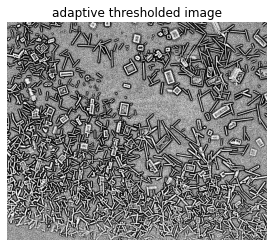

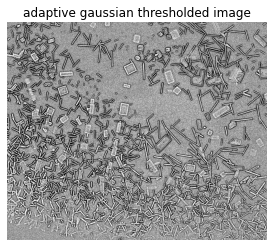

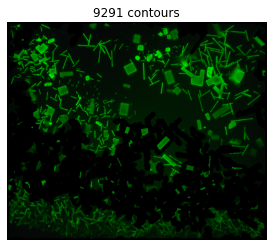

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt

def algorithm_2(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 1)
    # first int is size of pixel block, second - "sens"
    contours, hierarchy = cv.findContours(thr_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('adaptive thresholded image')
    plt.show()

    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 1)
    # first int is size of pixel block, second - "sens"
    contours, hierarchy = cv.findContours(thr_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('adaptive gaussian thresholded image')
    plt.show()

    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_2(img)

cv.drawContours(img, contours, -1, (0, 0, 0), 20, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()

Поскольку контрастность Mean Thresholding выше, то имеет смысл рассмотреть его работу при различных значениях
констант

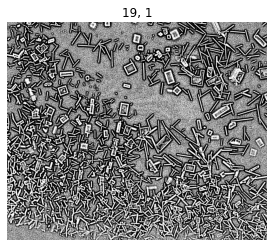

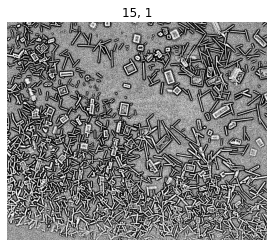

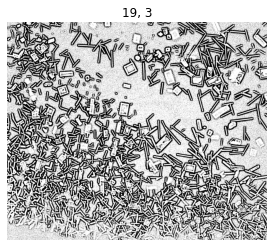

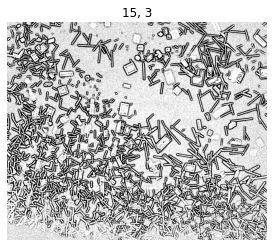

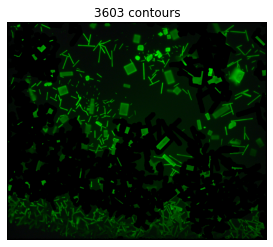

In [10]:
import cv2 as cv
from matplotlib import pyplot as plt

def algorithm_2(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 19, 1)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('19, 1')
    plt.show()

    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 1)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('15, 1')
    plt.show()

    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 19, 3)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('19, 3')
    plt.show()

    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 3)
    # first int is size of pixel block, second - "sens"
    contours, hierarchy = cv.findContours(thr_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('15, 3')
    plt.show()

    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_2(img)

cv.drawContours(img, contours, -1, (0, 0, 0), 20, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()


Чистовой вариант:


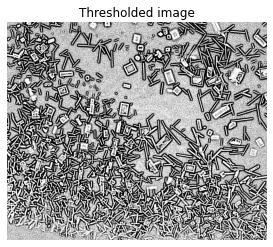

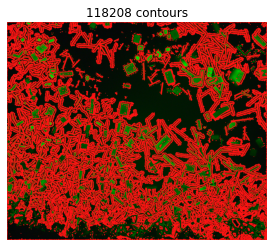

In [11]:
import cv2 as cv
from matplotlib import pyplot as plt

def algorithm_2(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 19, 2)
    ret, thr_img = cv.threshold(thr_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(thr_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('Thresholded image')
    plt.show()

    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_2(img)

cv.drawContours(img, contours, -1, (20, 20, 255), 5, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()

Результаты можно улучшить, если добавить функцию изменения
контрастности изображения

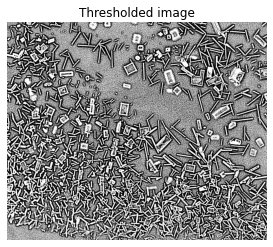

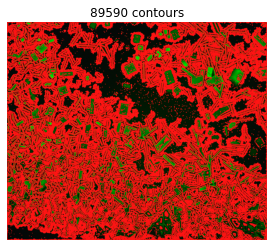

In [12]:
import cv2 as cv
from matplotlib import pyplot as plt

def algorithm_2(img):

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv.createCLAHE(clipLimit=3., tileGridSize=(8,8))

    lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv.split(lab)  # split on 3 different channels

    l2 = clahe.apply(l)  # apply CLAHE to the L-channel

    lab = cv.merge((l2,a,b))  # merge channels
    img = cv.cvtColor(lab, cv.COLOR_LAB2BGR)  # convert from LAB to BGR

    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    thr_img = cv.adaptiveThreshold(gray_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 19, 2)
    ret, thr_img = cv.threshold(thr_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
    contours, hierarchy = cv.findContours(thr_img, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

    thr_img = cv.cvtColor(thr_img, cv.COLOR_BGR2RGB)
    plt.imshow(thr_img)
    plt.axis('off')
    plt.title('Thresholded image')
    plt.show()

    return contours, hierarchy

img = cv.imread('res/cached_image.png')
contours, hierarchy = algorithm_2(img)

cv.drawContours(img, contours, -1, (20, 20, 255), 5, cv.LINE_AA, hierarchy, 1)
# -1 is below zero so all the contours will be drawn
# color is BGR tuple

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours)) + ' contours')
plt.show()

Попробуем ещё методы (например, Canny edge detector)

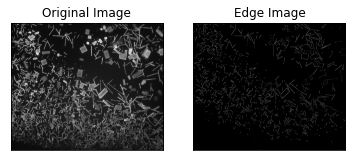

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('res/cached_image.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Ещё какой-то красивый код со StackOverflow:

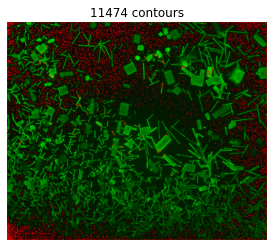

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

hsv_min = np.array((0, 54, 5), np.uint8)
hsv_max = np.array((187, 255, 253), np.uint8)

img = cv.imread('res/cached_image.png')

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)    # меняем цветовую модель с BGR на HSV
thresh = cv.inRange(hsv, hsv_min, hsv_max)  # применяем цветовой фильтр

# !!!
#_, contours0, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
(contours0, _) = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt)                      # пытаемся вписать прямоугольник
    box = cv.boxPoints(rect)                        # поиск четырех вершин прямоугольника
    box = np.int0(box)                              # округление координат
    cv.drawContours(img, [box], 0, (255, 0, 0), 2)  # рисуем прямоугольник


plt.imshow(img)
plt.axis('off')
plt.title(str(len(contours0)) + ' contours')
plt.show()